### Lire les deux premières ligne du csv des arbres de Grenoble(module csv, voir doc officielle)

### Que représentent elles ?

In [2]:
import csv

In [ ]:
import re
data = []
with open("ESP_PUBLIC.IDENTITE_ARBRE.csv") as file:
    for lines in file:
        line = re.split(r',(?=\D)', lines)
        line_final = []
        for items in line:
            item = items.replace('\n', '')
            line_final.append(item)         
        data.append(line_final)
       

In [ ]:
header = data[0]
data_set = data[1:]

In [ ]:
header

In [ ]:
data[1]

In [3]:
with open("ESP_PUBLIC.IDENTITE_ARBRE.csv") as csv_file:
    reader = csv.reader(csv_file)
    interestingrows=[row for idx, row in enumerate(reader) if idx in (0,1)]   
    header = interestingrows[0]
    data_first = interestingrows[1]

In [4]:
print(header)

['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE', 'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE', 'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE', 'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU', 'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE', 'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE', 'GeoJSON']


In [5]:
print(data_first)

['16750', 'ESP19318', 'ESP19318', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP174', "Arbre d'espaces ouverts", 'ESP995', 'Prc Echangeurs Bastion St Roch', '5', 'AR19318', 'Acer', '', '', 'Arbre adulte', '', '', '1975', '', '', '', '', '', '', '', '', '', '', 'Ville de Grenoble', '{"type":"Point","coordinates":[5.73941612552464,45.1911217700938]}']


### Extraire l’information concernant l’année de plantation pour l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List

In [6]:
with open("ESP_PUBLIC.IDENTITE_ARBRE.csv") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    annee_plantation = [row[19] for row in reader][1:]

In [7]:
annee_plantation[:10]

['1975',
 '1975',
 '2001',
 '1975',
 '2006',
 '1975',
 '1975',
 '1975',
 '1975',
 '2001']

In [8]:
#Afficher les 50 premières lignes et les 50 dernières lignes de cette liste.

In [9]:
slice_annee_plantation = annee_plantation[:50] + annee_plantation[-50:]

In [10]:
len(slice_annee_plantation)

100

### Pour combien d’arbres manque-t-il l’information concernant la date de plantation ?

In [11]:
count = 0
for years in annee_plantation:
    if years == '':
        count += 1
print(f"the number of missing <date de plantation> is {count}")

the number of missing <date de plantation> is 763


### Extraire l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List

In [12]:
with open("ESP_PUBLIC.IDENTITE_ARBRE.csv") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    interestingrows=[row for row in reader][1:]

### Combien d’arbres sont recensés dans ce jeu de données ?  

In [13]:
len(interestingrows)

31892

In [14]:
type(interestingrows)

list

### Combien d’arbres ont été plantés en moyenne chaque année ? 

In [19]:
# need to transfer '' in 0 => otherwise / is not possible (!= (''/95))
annee_plantation_mod = [0 if x == '' else int(x) for x in annee_plantation]

In [20]:
year_max = max(annee_plantation_mod)
year_min = min([x for x in annee_plantation_mod if x != 0])

In [21]:
year_max, year_min, year_max - year_min

(2019, 1924, 95)

In [22]:
print(f"plantés en moyenne chaque année: {int(len(annee_plantation_mod) / 95)}")

plantés en moyenne chaque année: 335


### Afficher tous les arbres ayant été plantés l’année de votre naissance.

In [23]:
arbre_1975 = []
for row in interestingrows:
    for i in range(len(row)):
        if row[i] == '1975':
            arbre_1975.append(row)

In [24]:
arbre_1975[0]

['16750',
 'ESP19318',
 'ESP19318',
 'VEG',
 'VEGETATION',
 'ESP01',
 'Arbre',
 'ESP174',
 "Arbre d'espaces ouverts",
 'ESP995',
 'Prc Echangeurs Bastion St Roch',
 '5',
 'AR19318',
 'Acer',
 '',
 '',
 'Arbre adulte',
 '',
 '',
 '1975',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Ville de Grenoble',
 '{"type":"Point","coordinates":[5.73941612552464,45.1911217700938]}']

In [27]:
print(f"In 1975, the year of my birth: >{len(arbre_1975)}< were planted in Grenoble")

In 1975, the year of my birth: >3784< were planted in Grenoble


### Combien d’arbres ont été plantés depuis votre naissance ?

In [28]:
arbre_depuis_1975 = [x for x in annee_plantation_mod if x >= 1975]
print(f"le numero d'arbres ont ete plantes depuis 1975: {len(arbre_depuis_1975)}")

le numero d'arbres ont ete plantes depuis 1975: 26396


In [29]:
print(f"numero d'arbres moyenne chaque année: {int(len(annee_plantation_mod) / 95)} multiplie avec age (45): {int(len(annee_plantation_mod) / 95) * 44}")

numero d'arbres moyenne chaque année: 335 multiplie avec age (45): 14740


### Le numero des arbres par anne....

In [32]:
arbres_year = {}
for year in annee_plantation_mod:
    if year not in arbres_year:
        arbres_year[year] = 1
    else:
        arbres_year[year] += 1

# sorting dict in descending order of values:
count_arbres_year = sorted([(values, key) for key, values in arbres_year.items()], reverse=True)         

In [52]:
print("the 5 top most years planting trees in Grenoble:\n{} {:15}".format("number Trees:", "Year:"))
for item in range(5):
    count, year = count_arbres_year[item]
    print("{:7} {:10}".format(count, year))
    

the 5 top most years planting trees in Grenoble:
number Trees: Year:          
   3783       1975
   1606       2001
   1511       1980
   1391       1970
   1028       2015


In [53]:
data_arbre_years = sorted([(str(key), values) for key, values in arbres_year.items()], reverse=False)

In [54]:
years = []
number_trees = []

for i in range(len(data_arbre_years)):
    year,num  = data_arbre_years[i]
    number_trees.append(num)
    years.append(year)


### Quel Maire a planté le plus d’arbres à Grenoble ?

In [55]:
majors = [['Paul Mistral',1919],
         ['Leon Martin',1932],
         ['Paul Cocat',1935],
         ['Frederic Lafleur',1944],
         ['Leon Martin',1945],
         ['Marius Bally',1947],
         ['Raymond Perinetti',1948],
         ['Leon Martin',1949],
         ['Albert Michallon',1959],
         ['Hubert Dubedout',1965],
         ['Alain Carignon',1983],
         ['Michel Destot',1995],
         ['Eric Piolle',2014]]

#list of only the majors....
m = [x[0] for x in majors]

#starting year of data set.....
majors[0][1] = 1924

#get starting years for each major: 
years_major = [years for (name, years) in majors]

#append year 2020 and remove 1st element => list shift by one element
years_major.append(2020)
years_major_mod = years_major[1:]

In [56]:
#append shifted list to majors....
#gives the period of government
for i in range(len(majors)):
    majors[i].append(years_major_mod[i])

In [58]:
majors[:2]

[['Paul Mistral', 1924, 1932], ['Leon Martin', 1932, 1935]]

In [142]:
# creating dict with year:major from 1924 until 2019....
majors_dict = {}
for item in majors:
    [a, b, c] = item
    majors_dict.update({b:a})
    b += 1
    while b < c:
        majors_dict.update({b:a})
        b += 1
%store majors_dict

Stored 'majors_dict' (dict)


In [60]:
count_arbres_major = {}

for key in majors_dict.keys():
    if key in arbres_year:
        if majors_dict[key] not in count_arbres_major:
            count_arbres_major[majors_dict[key]] = arbres_year[key]
        else:
            count_arbres_major[majors_dict[key]] += arbres_year[key]

### Solution:

In [61]:
count_arbres_major

{'Paul Mistral': 12,
 'Frederic Lafleur': 27,
 'Leon Martin': 527,
 'Albert Michallon': 732,
 'Hubert Dubedout': 12466,
 'Alain Carignon': 4612,
 'Michel Destot': 8882,
 'Eric Piolle': 3871}

#### creating data for figure:

In [63]:
data_arbre_major = sorted([(str(key), values) for key, values in majors_dict.items()], reverse=False)

In [67]:
data_arbre_major[:3]

[('1924', 'Paul Mistral'), ('1925', 'Paul Mistral'), ('1926', 'Paul Mistral')]

In [68]:
#years are all the years with number of planted trees
#select a list of majors to the corresponding year
major_year = [majors_dict[int(x)] for x in years[1:]]

In [69]:
major_year[:3]

['Paul Mistral', 'Frederic Lafleur', 'Leon Martin']

In [70]:
major_year.insert(0, '')

In [89]:
#create a list of majors keeping the order (for legend.....)
ma = []
for item in major_year:
    if item not in ma:
        ma.append(item)

In [90]:
color_basic = ['black','pink','orange','green','red','brown','blue','purple','cyan']

In [91]:
#zip object
#transform ti list or dict....
color_m_d = zip(ma, color_basic)
color_m_l = zip(ma, color_basic)

In [92]:
ma_d = dict(color_m_d)

In [93]:
ma_l = list(color_m_l)

In [94]:
ma_l

[('', 'black'),
 ('Paul Mistral', 'pink'),
 ('Frederic Lafleur', 'orange'),
 ('Leon Martin', 'green'),
 ('Albert Michallon', 'red'),
 ('Hubert Dubedout', 'brown'),
 ('Alain Carignon', 'blue'),
 ('Michel Destot', 'purple'),
 ('Eric Piolle', 'cyan')]

In [95]:
ma_d

{'': 'black',
 'Paul Mistral': 'pink',
 'Frederic Lafleur': 'orange',
 'Leon Martin': 'green',
 'Albert Michallon': 'red',
 'Hubert Dubedout': 'brown',
 'Alain Carignon': 'blue',
 'Michel Destot': 'purple',
 'Eric Piolle': 'cyan'}

In [96]:
#creating the color code for each major
color = [ma_d[x] for x in major_year]

### Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année.   

In [97]:
import matplotlib.pyplot as plt
import numpy as np

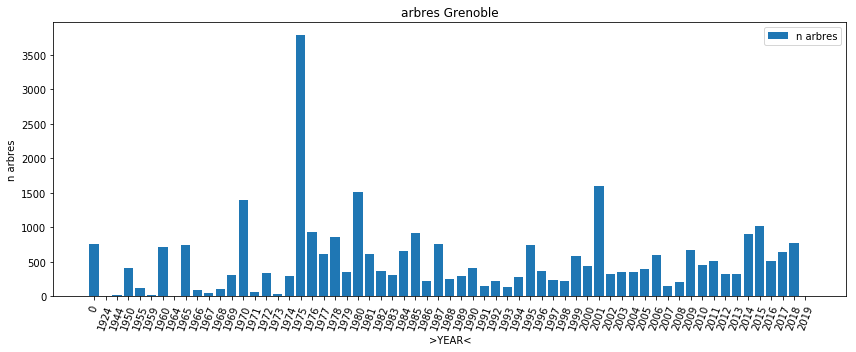

In [108]:
labels = years
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(range(len(years)), number_trees, label="n arbres")
ax.set_ylabel('n arbres')
ax.set_xlabel('>YEAR<')
ax.set_title('arbres Grenoble')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

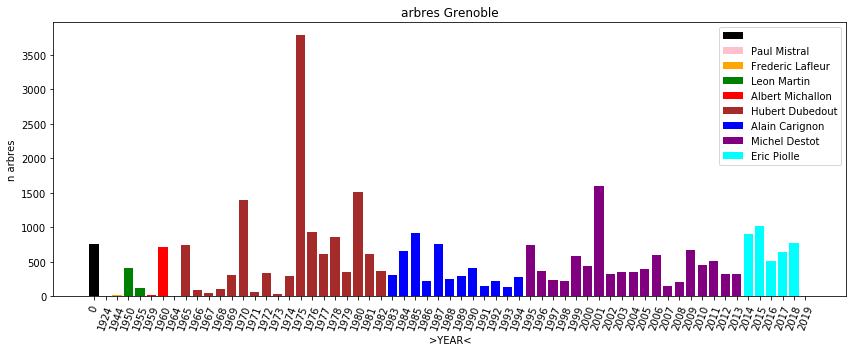

In [107]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_real = ax.bar(range(len(years)), number_trees, color=color)
plot_legend = ax.bar(range(9), np.zeros(9), color=color_basic)
ax.set_ylabel('n arbres')
ax.set_xlabel('>YEAR<')
ax.set_title('arbres Grenoble')
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)
ax.legend(plot_legend, [x[0] for x in ma_l])
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


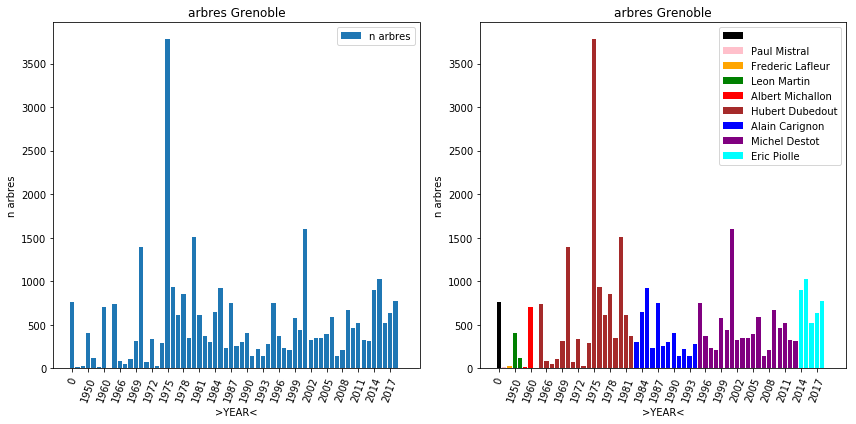

In [136]:
labels = years
x = np.arange(len(labels))

fig, ax = plt.subplots(1,2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(years)), number_trees, label="n arbres")
plt.ylabel('n arbres')
plt.xlabel('>YEAR<')
plt.title('arbres Grenoble')
plt.xticks(x[::3], years[::3], rotation=70)
plt.legend()

plt.subplot(1, 2, 2)
plot_real = plt.bar(range(len(years)), number_trees, color=color)
plot_legend = plt.bar(range(9), np.zeros(9), color=color_basic)
plt.ylabel('n arbres')
plt.xlabel('>YEAR<')
plt.title('arbres Grenoble')
plt.xticks(range(len(years))[::3], years[::3], rotation=70)
plt.legend(plot_legend, [x[0] for x in ma_l])

plt.tight_layout()
plt.show()

#plt.savefig('LesArbresGrenoble_TreesPerYearPlanted.png', quality=95, dpi=600)

In [123]:
arbres_year[2019]

7

### Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste. 

In [137]:
with open("ESP_PUBLIC.IDENTITE_ARBRE.csv") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    genre = [row[13] for row in reader][1:]

In [138]:
genre_year = list(zip(genre, annee_plantation))

In [139]:
genre_year[:10]

[('Acer', '1975'),
 ('Acer', '1975'),
 ('Fraxinus', '2001'),
 ('Carpinus', '1975'),
 ('Alnus', '2006'),
 ('Robinia', '1975'),
 ('Robinia', '1975'),
 ('Robinia', '1975'),
 ('Acer', '1975'),
 ('Fraxinus', '2001')]

In [140]:
genre.count('')

438

In [141]:
sorted([(year, genre) for (genre, year) in genre_year], reverse=True)[:11]

[('2019', 'Prunus'),
 ('2019', 'Prunus'),
 ('2019', 'Magnolia'),
 ('2019', 'Koelreuteria'),
 ('2019', 'Euodia'),
 ('2019', 'Alnus'),
 ('2019', 'Acer'),
 ('2018', 'Zelkova'),
 ('2018', 'Zelkova'),
 ('2018', 'Zelkova'),
 ('2018', 'Zelkova')]